In [1]:
# simple
#0-240, 240-380
#5e-6,  8e-6

#less simple
#0-140, 140-240, 240-360, 360-380
#5e-6,  4.5e-6,  5e-6,    1e-5
import os.path
import numpy as np
import matplotlib.pyplot as plt
import scipy
import refnx
from refnx.dataset import ReflectDataset, Data1D
from refnx.analysis import Transform, CurveFitter, Objective, Model, Parameter
from refnx.reflect import SLD, Slab, ReflectModel
print('refnx: %s\nscipy: %s\nnumpy: %s' % (refnx.version.version,
                   scipy.version.version, np.version.version))


refnx: 0.1.8
scipy: 1.3.0
numpy: 1.16.4


In [2]:
# simple structure
bs = [5,4.5,5]
thicks = [120,100,130]
roughs = [0,0,0]
loss = 1.
no_layers = len(bs)
no_layers = 3
layers = []
names = []
#names = ['layer1','layer2']
for i in range(no_layers):
    names.append('layer'+str(i))
for i in range(no_layers):
        sld = SLD(bs[i],name=names[i])
        layers.append(sld(thicks[i],roughs[i]))
structure = layers[0]
for layer in layers[1:]:
    structure|=layer
print("done")

done


In [3]:
print(structure)

________________________________________________________________________________
Structure:                
solvent: None
reverse structure: False
contract: 0

________________________________________________________________________________
Parameters:    'layer0'    
<Parameter:'layer0 - thick', value=120 (fixed)  , bounds=[-inf, inf]>
<Parameter:'layer0 - sld' , value=5 (fixed)  , bounds=[-inf, inf]>
<Parameter:'layer0 - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'layer0 - rough', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'layer0 - volfrac solvent', value=0 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters:    'layer1'    
<Parameter:'layer1 - thick', value=100 (fixed)  , bounds=[-inf, inf]>
<Parameter:'layer1 - sld' , value=4.5 (fixed)  , bounds=[-inf, inf]>
<Parameter:'layer1 - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'layer1 - rough', value=0 (fixed)  , bounds=[-inf, inf]

<IPython.core.display.Javascript object>


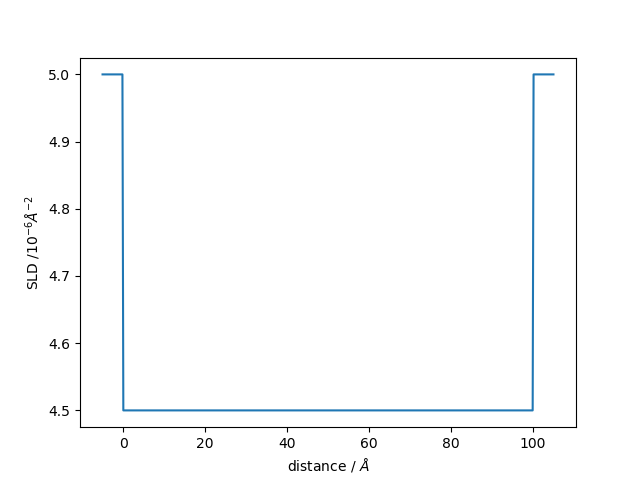

done


In [4]:
%matplotlib notebook
plt.plot(*structure.sld_profile())
plt.ylabel('SLD /$10^{-6} \AA^{-2}$')
plt.xlabel('distance / $\AA$');
print("done")

In [5]:
#dq/q = resolution = 5 == 5%
resolution = 5.
model = ReflectModel(structure, bkg=3e-6, dq=resolution)
# model.scale.setp(bounds=(0.6, 1.2), vary=True)
# model.bkg.setp(bounds=(1e-9, 9e-6), vary=True)
print("done")

done


<IPython.core.display.Javascript object>


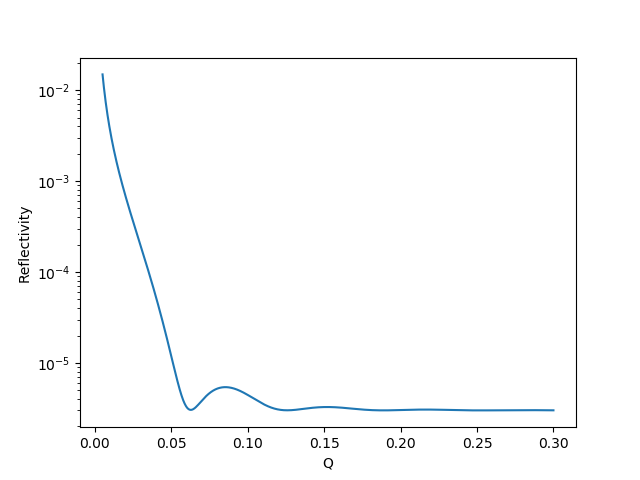

csv
cvs-collecting
out  [3.47819830e+02 8.77904741e+01 3.20810699e+03 9.49732939e-37
 1.65307010e-05] 
var:  [[1.76447440e+01 1.39762075e+02 1.90993913e+00 2.55098590e+04
  6.99628049e-05]
 [1.39762075e+02 1.10704093e+03 1.51284720e+01 2.01610925e+05
  5.54070662e-04]
 [1.90993913e+00 1.51284720e+01 2.06742813e-01 2.73481708e+03
  7.56735044e-06]
 [2.55098590e+04 2.01610925e+05 2.73481708e+03 2.55670288e+08
  1.48331018e-01]
 [6.99628049e-05 5.54070662e-04 7.56735044e-06 1.48331018e-01
  2.92147690e-10]]


In [6]:
#%matplotlib notebook
q = np.linspace(0.005, 0.3, 1001)
plt.figure(2)
plt.plot(q, model(q, x_err=resolution))
plt.xlabel('Q')
plt.ylabel('Reflectivity')
plt.yscale('log')
#Q, R(Q), sig_Q, sig_R =
R = model(q, x_err=resolution)
import make_sim_data as msd
sim_dR = msd.main(sim_q=q,sim_R=R)
#point to introduce loss

In [9]:
# simple structure
max_thickness = 350
structs = []
fitrs = []
ln_posts = []
#%matplotlib notebook
fig_i = 3
print(q, R, sim_dR)
from refnx.dataset import Data1D
data = Data1D(data=(q, R, sim_dR))
import make_model as mm
for i in range(3,4):
    thick = round(max_thickness/i)
    names = []
    bs = []
    thicks = []
    for j in range(i):
        names.append('layers'+str(j))
        if True:
            bs.append(5)
            thicks.append(thick)
            roughs.append(0)
        else:
            bs.append([5, 4, 6])
            thicks.append([thick, 100, 150])
            roughs.append([0, 0, 5])
            
    structure, fitter, objective, fig_i = mm.make_model(names,
                               bs, thicks, roughs, fig_i, data, mcmc=True)
    ln_post = objective.logpost()
    print("log post out: ", ln_post, "\npost out: ", np.exp(ln_post))
    structs.append(structure)
    fitrs.append(fitter)
    ln_posts.append(ln_post)
    



[0.005    0.005295 0.00559  ... 0.29941  0.299705 0.3     ] [1.49316004e-02 1.33025915e-02 1.19204620e-02 ... 3.00942973e-06
 3.00915509e-06 3.00888323e-06] [2.63824099e-04 2.35175563e-04 2.10905145e-04 ... 2.16303124e-07
 2.16089394e-07 2.15876092e-07]
________________________________________________________________________________
Structure:                
solvent: None
reverse structure: False
contract: 0

________________________________________________________________________________
Parameters:    'layers0'   
<Parameter:'layers0 - thick', value=117          , bounds=[50, 150]>
<Parameter:'layers0 - sld', value=5          , bounds=[4, 6]>
<Parameter:'layers0 - isld', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'layers0 - rough', value=0 (fixed)  , bounds=[-inf, inf]>
<Parameter:'layers0 - volfrac solvent', value=0 (fixed)  , bounds=[-inf, inf]>
________________________________________________________________________________
Parameters:    'layers1'   
<Parameter:'layers1 -

LinAlgError: The following Parameters have no effect on Objective.residuals, please consider fixing them.
[Parameter(value=117.0, name='layers0 - thick', vary=True, bounds=Interval(lb=50, ub=150), constraint=None), Parameter(value=117.0, name='layers1 - thick', vary=True, bounds=Interval(lb=50, ub=150), constraint=None), Parameter(value=0.0, name='layers1 - rough', vary=True, bounds=Interval(lb=0, ub=5), constraint=None), Parameter(value=117.0, name='layers2 - thick', vary=True, bounds=Interval(lb=50, ub=150), constraint=None), Parameter(value=0.0, name='layers2 - rough', vary=True, bounds=Interval(lb=0, ub=5), constraint=None)]